# Allow Users to Interactively Set a Range of Y Values they are Interested in, and Recolor Bars for Each Year of a Bar Chart.

---
## 1.0 Introduction

Each bar represents the mean value from normally random generated numbers for each year.  

The graph compares each bar to a range.  **Dark red** colors means 'likely to be within the range,' and light colors means likely outside the range.

## 2.0 Synopsis

I: 

1. called '%matplotlib notebook' to set the environment to render the bar graph later.
- imported modules which are used later
- called 'mpl.get_backend()' to set the environment to render the bar graph later.
- called 'np.random.seed(12345)' to ensure the random numbers later produced are reproducible.
- created a dataframe. Each row represents a year of a series of random normal generated numbers
- found the mean, standard error measure, confindence interval for each year/row
- called the method get_cmap('Reds') in order to use later.
- created the initial bar chart with two horizontal lines (a range) and a title.
- called a function called update_color() which colors bars (of the bar chart) **dark** red if likely within the range, and **light** colors if likely outside the range.
- called SpanSelector() which allows the user to interactively change the range and the color bars are updated (as described in the previous step).

## 3.0 Preprocessing

Here's the code to prepare the data and produce the graph.

<IPython.core.display.Javascript object>


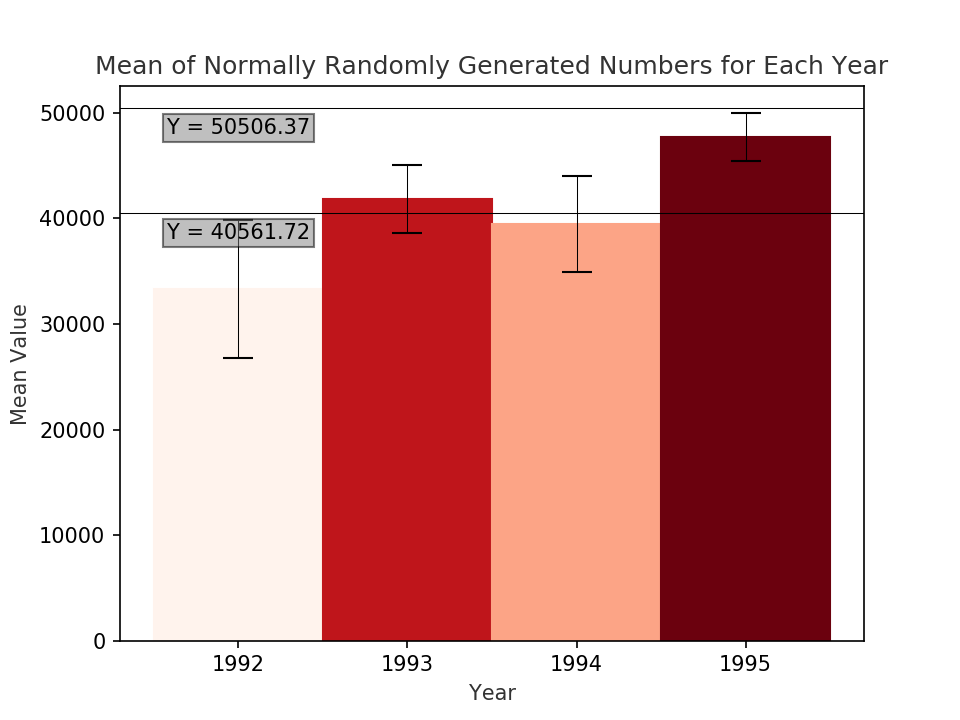

In [32]:
#step 1 - used a Ipython magic, i.e. a function and 'mpl.get_backend()' to set the environment to render the graph later
#also import modules which are used later

%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib as mpl
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib import cm
from matplotlib.widgets import SpanSelector

mpl.get_backend()

'''
step 1 - create a function that compares each bar(of a bar chart) to a range.  
Dark red colors mean 'likely to be inside the range.
Light red/white colors mean 'likely to be outside the range'

'''

def update_color(y_max, y_min):
    '''
    Inputs are two numeric values - these create a range.
    Find the probability within a range where 1 means likely within a range.
    Zero means likely not within a range
    '''
    prob = (st.norm.cdf(y_max, df.mean(axis=1), df.sem(axis = 1))
            - st.norm.cdf(y_min, df.mean(axis=1), df.sem(axis = 1)))
    
    #assign the probability to a color map
        
    for i in range(len(bars)):
        bars[i].set_color(c(prob[i]))
        
    return None

  
#step 2 - this function is called later for the user to update the bar chart later   
def onselect(vmin, vmax):
    # repostion lines and text when a range is selected
    text1.set_text('Y = {:.2f}'.format(vmax))
    text1.set_position((1992, vmax - 2500))
    line1.set_data([0, 1], [vmax] * 2)

    text2.set_text('Y = {:.2f}'.format(vmin))
    text2.set_position((1992, vmin - 2500))
    line2.set_data([0, 1], [vmin] * 2)
    
    update_color(line1.get_ydata()[0], line2.get_ydata()[0])
    
    
#step 3 - set the seed to ensure the code is reproducible
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

#step 4 - find the mean for each row
means = df.mean(axis=1)

#step 5 - find the confidence interval for each row or year
yerr = df.sem(axis = 1) * norm.ppf(0.975)

'''
goal - interactively compare each bar(of a bar chart) to a range.  Dark red colors mean 'likely to be inside the range.
Light red/white colors mean 'likely to be outside the range'

'''

#step 6 - create a color map which is used in the update_color() later
c = plt.get_cmap('Reds')

#step 7 - create a figure object and an axes object
fig, ax = plt.subplots(1)

'''
step 8 - draw the initial bar chart, width=width of bar, yerr input is series of confidence intervals,
tick_label=horizontal axis tick labels (removes inbetween values of x-axis tick labels).
Added a title.
'''

bars = ax.bar(df.index,  means,width = 1, yerr=yerr, color='red', tick_label =df.index,
              capsize=7, error_kw=dict(lw=0.5, capsize=7, capthick=1))
plt.title('Mean of Normally Randomly Generated Numbers for Each Year', alpha=0.8)
plt.ylabel('Mean Value', alpha=0.8)
plt.xlabel('Year', alpha=0.8)
'''
step 9 - call the update_color() which compares compares each bar(of a bar chart) to a range.  
Dark red colors mean 'likely to be inside the range.
Light red/white colors mean 'likely to be outside the range
'''
update_color(y_max = 43055.17, y_min = 38738.3)

# step 9 - initialise lines and texts'

line1 = ax.axhline(y=43055.17, c='k', lw=.5)
text1 = ax.text(1992, 43055.17+1500, 'Y=' + str(43055.17),horizontalalignment='center',
               bbox={'facecolor': 'gray', 'alpha': 0.5, 'pad': 2},)

line2 = ax.axhline(y=38738.3, c='k', lw=.5)
text2 = ax.text(1992, 38738.3 - 2500, 'Y =' + str(38738.3),horizontalalignment='center',
                bbox={'facecolor': 'gray', 'alpha': 0.5, 'pad': 2},)

'''
step 10 - call a function SpanSelector() 
input the axis, the onselect function created above.
SpanSelector() associates an event(the selected range) with the function onselect().
Create a vertical event where the user highlights the graph - i.e. create a range.
The horizontal lines and text adjust where the user highlighted
The color of the bars of the bar chart adjust appropriately - Dark red colors mean 'likely to be inside the range.
Light red/white colors mean 'likely to be outside the range'
'''
 
span = SpanSelector(ax, onselect, 'vertical')
